In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import deque

In [2]:
terran = pd.read_csv('../data/terran_stats.csv')

In [3]:
terran.fillna(0, inplace=True)

In [4]:
terran

,Unit,Mineral,Vespene,Supply,BuildTime,BuildFrom,Life,Energy,Armor,DPSground,DPSair
0,SCV,50,0.0,1,17,CommandCenter,45,0.0,0,4.67,0.00
1,Marine,50,0.0,1,25,Barracks,45,0.0,0,9.80,9.80
2,Marauder,100,25.0,2,30,Barracks,125,0.0,1,9.30,0.00
3,Reaper,50,50.0,1,45,Barracks,60,0.0,0,10.10,0.00
4,Ghost,200,100.0,2,40,Barracks,100,200.0,0,9.30,9.30
5,Hellion,100,0.0,2,30,Factory,90,0.0,0,4.48,0.00
6,SiegeTank,150,125.0,3,45,Factory,160,0.0,1,20.27,0.00
7,Thor,300,200.0,6,60,Factory,400,0.0,1,65.90,23.40
8,Viking,150,75.0,2,42,Starport,125,0.0,0,16.80,14.00
9,Medivac,100,100.0,2,42,Starport,150,200.0,1,0.00,0.00


In [5]:
zerg = pd.read_csv('../data/zerg_stats.csv')
zerg.fillna(0, inplace=True)

In [6]:
zerg

,Unit,Mineral,Vespene,Supply,BuildTime,BuildFrom,Life,Energy,Armor,DPSground,DPSair
0,Larva,0.0,0.0,0.0,0.0,0,25,0.0,10.0,0.00,0.00
1,Drone,50.0,0.0,1.0,17.0,Larva,40,0.0,0.0,4.67,0.00
2,Overlord,100.0,0.0,0.0,25.0,Larva,200,0.0,0.0,0.00,0.00
3,Zergling,50.0,0.0,1.0,24.0,Larva,35,0.0,0.0,10.00,0.00
4,Queen,150.0,0.0,2.0,50.0,Hatchery,175,200.0,1.0,11.20,12.60
5,Hydralisk,100.0,50.0,2.0,33.0,Larva,80,0.0,0.0,20.40,20.40
6,Baneling,25.0,25.0,0.0,20.0,Zergling,30,0.0,0.0,20.00,0.00
7,Overseer,50.0,50.0,0.0,17.0,Overlord,200,200.0,1.0,0.00,0.00
8,Roach,75.0,25.0,2.0,27.0,Larva,145,0.0,1.0,11.20,0.00
9,Infestor,100.0,150.0,2.0,50.0,Larva,90,200.0,0.0,0.00,0.00


In [7]:
protoss = pd.read_csv('../data/protoss_stats.csv')
protoss.fillna(0, inplace=True)

In [8]:
protoss

,Unit,Mineral,Vespene,Supply,BuildTime,BuildFrom,Life,Shield,Energy,Armor,DPSground,DPSair
0,Probe,50.0,0.0,1.0,17,Nexus,20,20,0.0,0,4.67,0.00
1,Zealot,100.0,0.0,2.0,38,Gateway,100,50,0.0,1,18.60,0.00
2,Stalker,125.0,50.0,2.0,42,Gateway,80,80,0.0,1,9.70,9.70
3,Sentry,50.0,100.0,2.0,37,Gateway,40,40,200.0,1,8.40,8.40
4,Observer,25.0,75.0,1.0,30,RoboticsFacility,40,20,0.0,0,0.00,0.00
5,Immortal,250.0,100.0,4.0,55,RoboticsFacility,200,100,0.0,1,19.20,0.00
6,WarpPrism,200.0,0.0,2.0,50,RoboticsFacility,100,100,0.0,0,0.00,0.00
7,Colossus,300.0,200.0,6.0,75,RoboticsFacility,200,150,0.0,1,18.70,0.00
8,Phoenix,150.0,100.0,2.0,35,Stargate,120,60,200.0,0,12.70,0.00
9,VoidRay,250.0,150.0,4.0,60,Stargate,150,100,0.0,0,16.80,16.80


### Income
* 12 workers
* 8 mineral patches
* per patch per minute:
    - 1 scv : 42 minerals 38 gas
    - 2 scv: 84 minerals 80 gas
    - 3 scv: 102 minerals 107 gas
    
start: 12 / 8 minerals 0 / 2 gas
saturated: 16 / 8 minerals 6 / 2 gas

from 0 to 10 workers:

In [9]:
duration = 200
min_vs_sec = [] 
minerals = 0
gas = 0
workers = 12
units = 12
max_workers = 16
minerals_per_sec_worker = 42/60
minerals_per_sec = minerals_per_sec_worker* workers
max_base = 2
base = 1
supply = 0
supply_cap = 16
max_queu = 4

workers_queu = deque([])


for t in range(duration):
    minerals += minerals_per_sec
            
    # produce new worker
    if (minerals > 50) and (workers+len(workers_queu)) < max_workers and units < supply_cap:
        if len(workers_queu) < max_queu:
            workers_queu.appendleft(t+17)
            units += 1
            minerals -= 50 
        
    # raise supply cap
    if units == supply_cap and minerals > 100:
        minerals -= 100
        supply_cap += 8
        supply += 1
        
    # update income
    if minerals_per_sec_worker < 84/60:
        minerals_per_sec = minerals_per_sec_worker * workers
        
    # build new base
    if minerals > 400 and base < max_base:
        minerals -= 400
        base += 1
        max_workers += 16
        max_queu += 4
        
    if workers_queu and workers_queu[-1] == t:
        w = workers_queu.pop()
        
        workers += 1
        
    
    min_vs_sec.append(minerals)

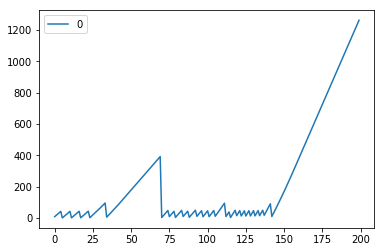

In [10]:
pd.DataFrame(min_vs_sec).plot()
plt.show()

In [11]:
minerals_per_sec

22.4

In [12]:
workers

32

In [13]:
max_workers

32

In [14]:
supply

3

In [15]:
base

2

In [16]:
workers_queu

deque([])

In [17]:
max_queu

8

### Best DPS for money

In [18]:
terran['DPSground_efficiency'] = terran.DPSground/(terran.Mineral + terran.Vespene)

In [19]:
terran['DPSair_efficiency'] = terran.DPSair/(terran.Mineral + terran.Vespene)

In [20]:
terran

,Unit,Mineral,Vespene,Supply,BuildTime,BuildFrom,Life,Energy,Armor,DPSground,DPSair,DPSground_efficiency,DPSair_efficiency
0,SCV,50,0.0,1,17,CommandCenter,45,0.0,0,4.67,0.00,0.093400,0.000000
1,Marine,50,0.0,1,25,Barracks,45,0.0,0,9.80,9.80,0.196000,0.196000
2,Marauder,100,25.0,2,30,Barracks,125,0.0,1,9.30,0.00,0.074400,0.000000
3,Reaper,50,50.0,1,45,Barracks,60,0.0,0,10.10,0.00,0.101000,0.000000
4,Ghost,200,100.0,2,40,Barracks,100,200.0,0,9.30,9.30,0.031000,0.031000
5,Hellion,100,0.0,2,30,Factory,90,0.0,0,4.48,0.00,0.044800,0.000000
6,SiegeTank,150,125.0,3,45,Factory,160,0.0,1,20.27,0.00,0.073709,0.000000
7,Thor,300,200.0,6,60,Factory,400,0.0,1,65.90,23.40,0.131800,0.046800
8,Viking,150,75.0,2,42,Starport,125,0.0,0,16.80,14.00,0.074667,0.062222
9,Medivac,100,100.0,2,42,Starport,150,200.0,1,0.00,0.00,0.000000,0.000000


In [21]:
zerg['DPSground_efficiency'] = zerg.DPSground/(zerg.Mineral + zerg.Vespene)
zerg['DPSair_efficiency'] = zerg.DPSair/(zerg.Mineral + zerg.Vespene)
zerg

,Unit,Mineral,Vespene,Supply,BuildTime,BuildFrom,Life,Energy,Armor,DPSground,DPSair,DPSground_efficiency,DPSair_efficiency
0,Larva,0.0,0.0,0.0,0.0,0,25,0.0,10.0,0.00,0.00,NaN,NaN
1,Drone,50.0,0.0,1.0,17.0,Larva,40,0.0,0.0,4.67,0.00,0.093400,0.00000
2,Overlord,100.0,0.0,0.0,25.0,Larva,200,0.0,0.0,0.00,0.00,0.000000,0.00000
3,Zergling,50.0,0.0,1.0,24.0,Larva,35,0.0,0.0,10.00,0.00,0.200000,0.00000
4,Queen,150.0,0.0,2.0,50.0,Hatchery,175,200.0,1.0,11.20,12.60,0.074667,0.08400
5,Hydralisk,100.0,50.0,2.0,33.0,Larva,80,0.0,0.0,20.40,20.40,0.136000,0.13600
6,Baneling,25.0,25.0,0.0,20.0,Zergling,30,0.0,0.0,20.00,0.00,0.400000,0.00000
7,Overseer,50.0,50.0,0.0,17.0,Overlord,200,200.0,1.0,0.00,0.00,0.000000,0.00000
8,Roach,75.0,25.0,2.0,27.0,Larva,145,0.0,1.0,11.20,0.00,0.112000,0.00000
9,Infestor,100.0,150.0,2.0,50.0,Larva,90,200.0,0.0,0.00,0.00,0.000000,0.00000


In [22]:
protoss['DPSground_efficiency'] = protoss.DPSground/(protoss.Mineral + protoss.Vespene)
protoss['DPSair_efficiency'] = protoss.DPSair/(protoss.Mineral + protoss.Vespene)
protoss

,Unit,Mineral,Vespene,Supply,BuildTime,BuildFrom,Life,Shield,Energy,Armor,DPSground,DPSair,DPSground_efficiency,DPSair_efficiency
0,Probe,50.0,0.0,1.0,17,Nexus,20,20,0.0,0,4.67,0.00,0.093400,0.000000
1,Zealot,100.0,0.0,2.0,38,Gateway,100,50,0.0,1,18.60,0.00,0.186000,0.000000
2,Stalker,125.0,50.0,2.0,42,Gateway,80,80,0.0,1,9.70,9.70,0.055429,0.055429
3,Sentry,50.0,100.0,2.0,37,Gateway,40,40,200.0,1,8.40,8.40,0.056000,0.056000
4,Observer,25.0,75.0,1.0,30,RoboticsFacility,40,20,0.0,0,0.00,0.00,0.000000,0.000000
5,Immortal,250.0,100.0,4.0,55,RoboticsFacility,200,100,0.0,1,19.20,0.00,0.054857,0.000000
6,WarpPrism,200.0,0.0,2.0,50,RoboticsFacility,100,100,0.0,0,0.00,0.00,0.000000,0.000000
7,Colossus,300.0,200.0,6.0,75,RoboticsFacility,200,150,0.0,1,18.70,0.00,0.037400,0.000000
8,Phoenix,150.0,100.0,2.0,35,Stargate,120,60,200.0,0,12.70,0.00,0.050800,0.000000
9,VoidRay,250.0,150.0,4.0,60,Stargate,150,100,0.0,0,16.80,16.80,0.042000,0.042000
